In [58]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [122]:
X=np.load("X.npy")
Y=np.load("Y.npy")

In [123]:
# Expand the dimensions to add a dimension in between ie from N,100 to N,1,100
# This is because conv1D requires this format of N,C,L
# N = mini batch size 
# C = Channels : 1 in this case
# L = length or no of features : 100 here
X=np.expand_dims(X,axis=1)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

In [64]:
X.shape

(3263, 1, 100)

In [65]:
input_size = 100
num_classes = 500
batch_size = 100
learning_rate = 0.0001

In [66]:
class Net(nn.Module):
    def __init__(self,input_size,num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv1d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout()
        self.fc1 = nn.Linear(1840, 50)
        self.fc2 = nn.Linear(50, 500)
        self.relu = nn.ReLU()
#         self.relu = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.conv2_drop(out)
        out = self.relu(out)
        out = out.view(-1,1840)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        return F.log_softmax(out, dim=1)
        
#         return out

In [91]:
model = Net(input_size,num_classes)

In [93]:
model.cuda()

Net(
  (conv1): Conv1d (1, 10, kernel_size=(5,), stride=(1,))
  (conv2): Conv1d (10, 20, kernel_size=(5,), stride=(1,))
  (conv2_drop): Dropout(p=0.5)
  (fc1): Linear(in_features=1840, out_features=50)
  (fc2): Linear(in_features=50, out_features=500)
  (relu): ReLU()
)

In [105]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [106]:
epochs=100

In [ ]:
# test
losses=[]
lr_updates=0
for epoch in range(epochs):
    
    epoch +=1
    for x,y in zip(X_train,Y_train):
        y=np.array([y])
        x=torch.from_numpy(np.expand_dims(x, axis=0))
#         x=torch.from_numpy(x)
        y=torch.from_numpy(y)
        
        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))
        
        #clear grads
        optimizer.zero_grad()
#         print("gradients cleared")
        #forward to get predicted values
        
        outputs = model.forward(inputs)
#         print("Forward pass done")
        loss = criterion(outputs, labels)
#         print("loss calculated")
        
        
        loss.backward()# back props
#         print("backprop done")
        optimizer.step()# update the parameters
    losses.append(float(loss))
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

In [108]:
outputs.shape

torch.Size([1, 500])

In [109]:
labels.shape

torch.Size([1])

In [110]:
# FOR TRAIn MODEL
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

In [111]:
correct=0
total_train_compounds=len(Y_train)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    if (int(max_index)==Y_train[i]):
        correct+=1

print("The train accuracy is {}".format((correct/total_train_compounds)*100))

The train accuracy is 95.48241368183284


In [112]:
# Testing 

In [113]:
# FOR TEST MODEL
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

In [114]:
# The test accuracy
test_correct=0
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 68.29268292682927


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

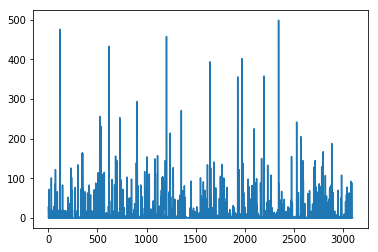

In [117]:
plt.plot(Y_train)

In [118]:
Y_train

array([27,  0,  0, ...,  0,  0,  0])

In [119]:
# FOR THE ENTIRE DATASET

In [124]:
model_pred_total=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))

In [126]:
# The test accuracy
total_correct=0
total_compounds=len(Y)
Y_predicited=[]
for i,compound in enumerate(model_pred_total):

    max_,max_index=torch.max(compound,0)
    Y_predicited.append(int(max_index))
    if (int(max_index)==Y[i]):
        total_correct+=1

print("The total accuracy is {}".format((total_correct/total_compounds)*100))

The total accuracy is 93.87067116150781


In [127]:
Y

array([0, 0, 0, ..., 8, 0, 0])

In [128]:
Y_predicited=np.array(Y_predicited)

In [129]:
Y_predicited

array([0, 0, 0, ..., 8, 0, 0])

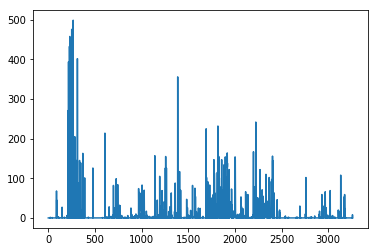

In [130]:
plt.plot(Y_predicited)

In [131]:
torch.save(model.state_dict(),"Classification using DNN-Conv1D.pyt")